In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
# obtener la data 
df = pd.read_csv("promos_uio.csv")
df.head()


,Unnamed: 0,FECHA,VERSION,DURACION,TIPO,HORA,PROGRAMA,BREAK,TARIFA,CATEGORIA,ITEM,GENERO,SECCION/BLOQUE,CIUDAD,CAMPAÑA,HOR_INI-HH:MM:SS,HOR_FIN-HH:MM:SS,Rat.Prom.Prog,TARGET
0,87,2023-01-01,AVANCE DIARIO IV,40.0,AUTOPROMOCION,06:07,LARGOMETRAJE (M) (S-D),1.0,133.333300,PROMOCION DEL CANAL,MASTER CHEF ECUADOR 4T,LARGOMETRAJE,A,QUITO,CONCURSO/ENTRETENIMIENTO,06:07:39,06:08:18,0.243378,18+
1,88,2023-01-01,AVANCE DIARIO,38.0,AUTOPROMOCION,06:08,LARGOMETRAJE (M) (S-D),1.0,126.666635,PROMOCION DEL CANAL,IMPACTOS 2022,LARGOMETRAJE,A,QUITO,NOTICIERO,06:08:17,06:08:55,0.243378,18+
2,89,2023-01-01,AVANCE DIARIO,30.0,AUTOPROMOCION,06:23,LARGOMETRAJE (M) (S-D),2.0,100.000000,PROMOCION DEL CANAL,REPRISE MUNDIAL CATAR 2022,LARGOMETRAJE,A,QUITO,DEPORTIVO,06:23:56,06:24:26,0.243378,18+
3,90,2023-01-01,AVANCE DIARIO IV,30.0,AUTOPROMOCION,06:24,LARGOMETRAJE (M) (S-D),2.0,100.000000,PROMOCION DEL CANAL,DIA A DIA (D),LARGOMETRAJE,A,QUITO,REVISTA INFORMATIVA,06:24:29,06:24:58,0.243378,18+
4,91,2023-01-01,AVANCE DIARIO IV,40.0,AUTOPROMOCION,06:41,LARGOMETRAJE (M) (S-D),3.0,133.333300,PROMOCION DEL CANAL,MASTER CHEF ECUADOR 4T,LARGOMETRAJE,A,QUITO,CONCURSO/ENTRETENIMIENTO,06:41:35,06:42:14,0.243378,18+


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452373 entries, 0 to 452372
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        452373 non-null  int64  
 1   FECHA             452373 non-null  object 
 2   VERSION           452373 non-null  object 
 3   DURACION          452373 non-null  float64
 4   TIPO              452373 non-null  object 
 5   HORA              452373 non-null  object 
 6   PROGRAMA          452373 non-null  object 
 7   BREAK             452373 non-null  float64
 8   TARIFA            452373 non-null  float64
 9   CATEGORIA         452373 non-null  object 
 10  ITEM              452373 non-null  object 
 11  GENERO            452373 non-null  object 
 12  SECCION/BLOQUE    452373 non-null  object 
 13  CIUDAD            452373 non-null  object 
 14  CAMPAÑA           452373 non-null  object 
 15  HOR_INI-HH:MM:SS  452373 non-null  object 
 16  HOR_FIN-HH:MM:SS  45

In [6]:
df.describe()

,Unnamed: 0,DURACION,BREAK,TARIFA,Rat.Prom.Prog
count,452373.000000,452373.000000,452373.000000,452373.000000,452373.000000
mean,423137.878596,21.307041,1.858897,512.635679,1.514878
std,243468.637288,14.556967,1.140477,365.154014,1.250496
min,87.000000,1.000000,1.000000,0.000000,0.000000
25%,212184.000000,8.000000,1.000000,283.333300,0.647269
50%,423152.000000,20.000000,1.000000,400.000000,1.260055
75%,635262.000000,30.000000,2.000000,733.333300,2.028141
max,843434.000000,425.000000,10.000000,7360.000000,26.164858


In [7]:
df.rename( columns = {"Rat.Prom.Prog" :  "RATING" }, inplace =  True )

In [8]:
df.head()

,Unnamed: 0,FECHA,VERSION,DURACION,TIPO,HORA,PROGRAMA,BREAK,TARIFA,CATEGORIA,ITEM,GENERO,SECCION/BLOQUE,CIUDAD,CAMPAÑA,HOR_INI-HH:MM:SS,HOR_FIN-HH:MM:SS,RATING,TARGET
0,87,2023-01-01,AVANCE DIARIO IV,40.0,AUTOPROMOCION,06:07,LARGOMETRAJE (M) (S-D),1.0,133.333300,PROMOCION DEL CANAL,MASTER CHEF ECUADOR 4T,LARGOMETRAJE,A,QUITO,CONCURSO/ENTRETENIMIENTO,06:07:39,06:08:18,0.243378,18+
1,88,2023-01-01,AVANCE DIARIO,38.0,AUTOPROMOCION,06:08,LARGOMETRAJE (M) (S-D),1.0,126.666635,PROMOCION DEL CANAL,IMPACTOS 2022,LARGOMETRAJE,A,QUITO,NOTICIERO,06:08:17,06:08:55,0.243378,18+
2,89,2023-01-01,AVANCE DIARIO,30.0,AUTOPROMOCION,06:23,LARGOMETRAJE (M) (S-D),2.0,100.000000,PROMOCION DEL CANAL,REPRISE MUNDIAL CATAR 2022,LARGOMETRAJE,A,QUITO,DEPORTIVO,06:23:56,06:24:26,0.243378,18+
3,90,2023-01-01,AVANCE DIARIO IV,30.0,AUTOPROMOCION,06:24,LARGOMETRAJE (M) (S-D),2.0,100.000000,PROMOCION DEL CANAL,DIA A DIA (D),LARGOMETRAJE,A,QUITO,REVISTA INFORMATIVA,06:24:29,06:24:58,0.243378,18+
4,91,2023-01-01,AVANCE DIARIO IV,40.0,AUTOPROMOCION,06:41,LARGOMETRAJE (M) (S-D),3.0,133.333300,PROMOCION DEL CANAL,MASTER CHEF ECUADOR 4T,LARGOMETRAJE,A,QUITO,CONCURSO/ENTRETENIMIENTO,06:41:35,06:42:14,0.243378,18+


In [9]:
df["GENERO"].unique()

array(['LARGOMETRAJE', 'DEPORTIVO', 'HUMORISTICO', 'NOTICIERO',
       'REVISTA INFORMATIVA', 'OPINION', 'CONCURSO/ENTRETENIMIENTO',
       'INFANTIL', 'SERIE', 'TELENOVELA', 'MUSICAL', 'DOCUMENTAL',
       'CULINARIO', 'ESPECIALIZADO', 'ANUNCIO/AVISOS'], dtype=object)

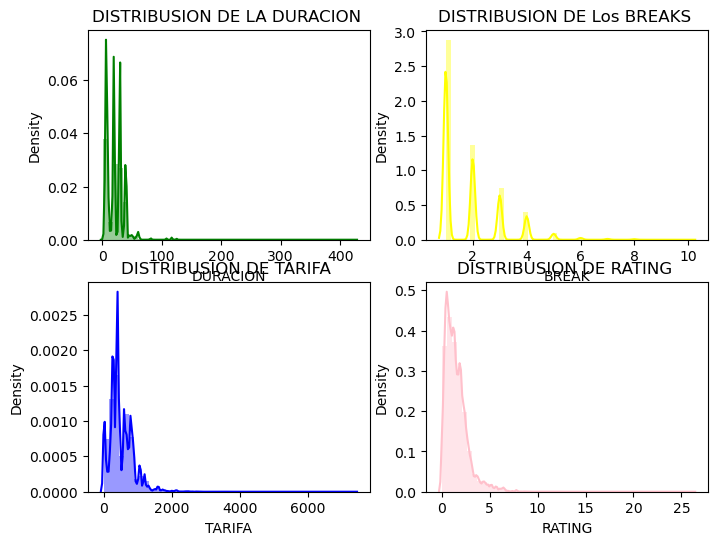

In [10]:
plt.figure( figsize = (8,6))

plt.subplot(2, 2, 1)
sns.distplot( df["DURACION"], color = "green")
plt.title('DISTRIBUSION DE LA DURACION ')


plt.subplot(2, 2, 2)
sns.distplot( df["BREAK"], color = "yellow")
plt.title('DISTRIBUSION DE Los BREAKS ')


plt.subplot(2, 2, 3)
sns.distplot( df["TARIFA"], color = "blue")
plt.title('DISTRIBUSION DE TARIFA ')


plt.subplot(2, 2, 4)
sns.distplot( df["RATING"], color = "pink")
plt.title('DISTRIBUSION DE RATING ')
plt.show()




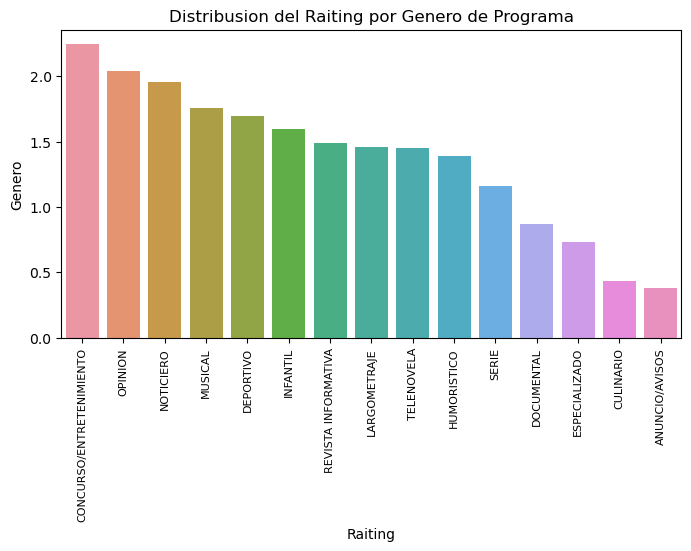

In [11]:
# calcular la cantidad de raiting en cada genero 
rating_genero  = df.groupby("GENERO")["RATING"].mean().sort_values( ascending =  False  )

plt.figure( figsize = (8,4))
sns.barplot( x = rating_genero.index, y = rating_genero.values)
plt.title("Distribusion del Raiting por Genero de Programa")
plt.xlabel("Raiting")
plt.ylabel("Genero")
plt.xticks( rotation = 90, size = 8) 
plt.show()

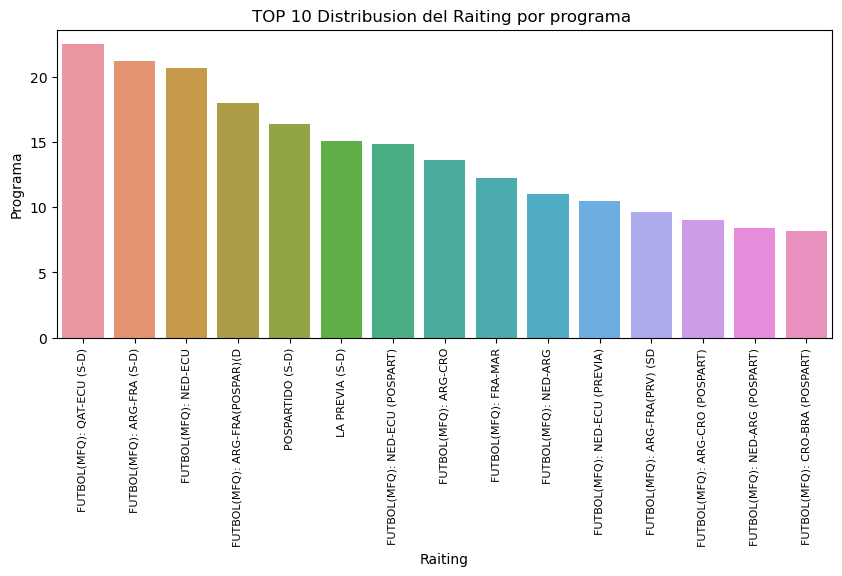

In [11]:
rating_programa_to_10   = df.groupby("PROGRAMA")["RATING"].mean().sort_values( ascending =  False  ).head(15)

plt.figure( figsize = (10,4))
sns.barplot( x = rating_programa_to_10.index, y = rating_programa_to_10.values)
plt.title("TOP 10 Distribusion del Raiting por programa ")
plt.xlabel("Raiting")
plt.ylabel("Programa")
plt.xticks( rotation = 90, size = 8) 
plt.show()

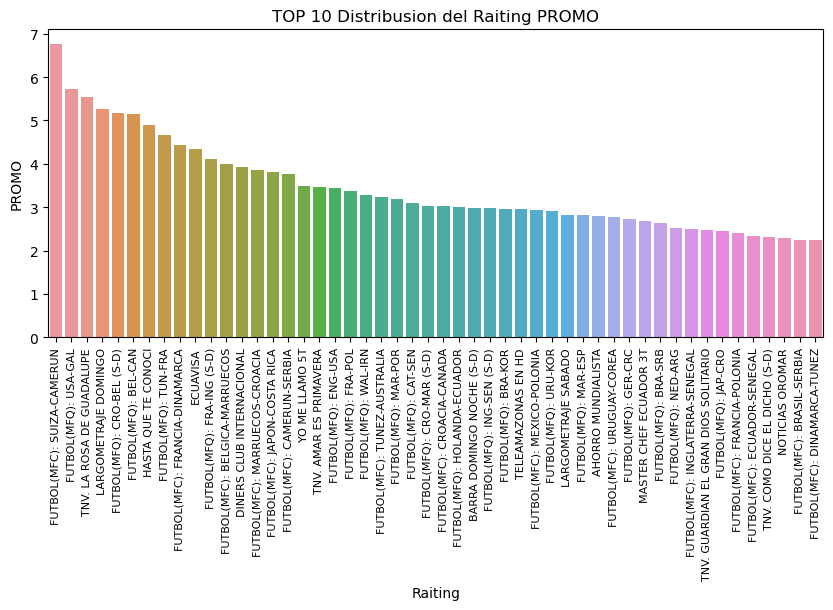

In [12]:
rating_PROMO_10   = df.groupby("ITEM")["RATING"].mean().sort_values( ascending =  False  ).head(50)

plt.figure( figsize = (10,4))
sns.barplot( x =rating_PROMO_10.index, y = rating_PROMO_10.values)
plt.title("TOP 10 Distribusion del Raiting PROMO")
plt.xlabel("Raiting")
plt.ylabel("PROMO")
plt.xticks( rotation = 90, size = 8) 
plt.show()

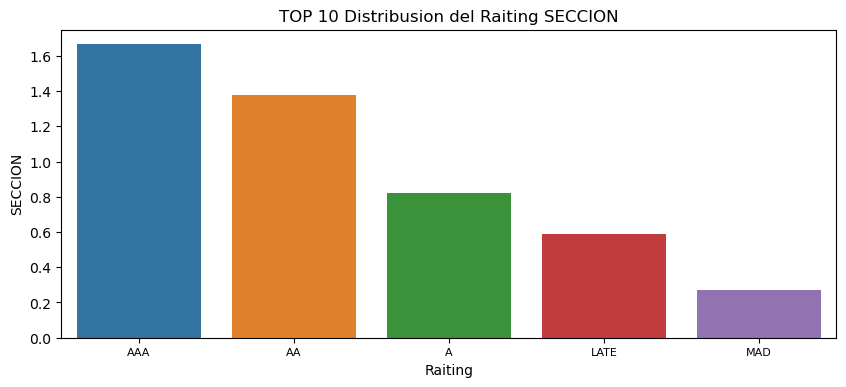

In [13]:
rating_PROMO_10   = df.groupby("SECCION/BLOQUE")["RATING"].mean().sort_values( ascending =  False  ).head(50)

plt.figure( figsize = (10,4))
sns.barplot( x =rating_PROMO_10.index, y = rating_PROMO_10.values)
plt.title("TOP 10 Distribusion del Raiting SECCION")
plt.xlabel("Raiting")
plt.ylabel("SECCION")
plt.xticks( rotation = 0, size = 8) 
plt.show()

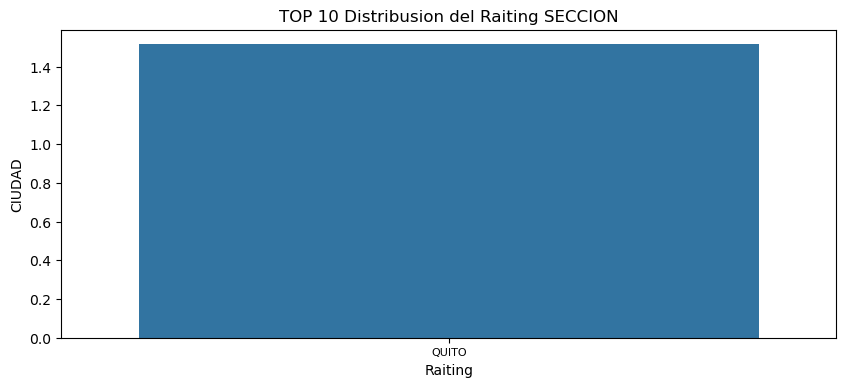

In [13]:
rating_PROMO_10   = df.groupby("CIUDAD")["RATING"].mean().sort_values( ascending =  False  ).head(50)

plt.figure( figsize = (10,4))
sns.barplot( x =rating_PROMO_10.index, y = rating_PROMO_10.values)
plt.title("TOP 10 Distribusion del Raiting SECCION")
plt.xlabel("Raiting")
plt.ylabel("CIUDAD")
plt.xticks( rotation = 0, size = 8) 
plt.show()

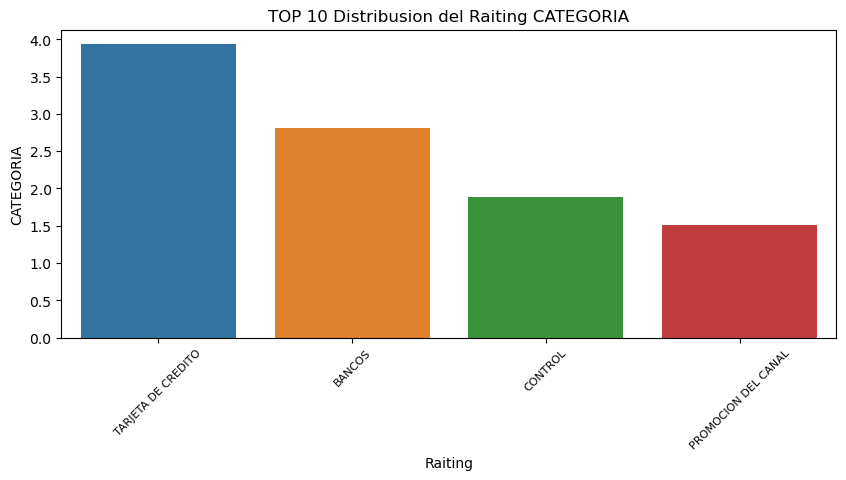

In [14]:
rating_PROMO_10   = df.groupby("CATEGORIA")["RATING"].mean().sort_values( ascending =  False  ).head(50)

plt.figure( figsize = (10,4))
sns.barplot( x =rating_PROMO_10.index, y = rating_PROMO_10.values)
plt.title("TOP 10 Distribusion del Raiting CATEGORIA")
plt.xlabel("Raiting")
plt.ylabel("CATEGORIA")
plt.xticks( rotation = 45, size = 8) 
plt.show()

In [15]:
df.head()

,Unnamed: 0,FECHA,VERSION,DURACION,TIPO,HORA,PROGRAMA,BREAK,TARIFA,CATEGORIA,ITEM,GENERO,SECCION/BLOQUE,CIUDAD,CAMPAÑA,HOR_INI-HH:MM:SS,HOR_FIN-HH:MM:SS,RATING,TARGET
0,87,2023-01-01,AVANCE DIARIO IV,40.0,AUTOPROMOCION,06:07,LARGOMETRAJE (M) (S-D),1.0,133.333300,PROMOCION DEL CANAL,MASTER CHEF ECUADOR 4T,LARGOMETRAJE,A,QUITO,CONCURSO/ENTRETENIMIENTO,06:07:39,06:08:18,0.243378,18+
1,88,2023-01-01,AVANCE DIARIO,38.0,AUTOPROMOCION,06:08,LARGOMETRAJE (M) (S-D),1.0,126.666635,PROMOCION DEL CANAL,IMPACTOS 2022,LARGOMETRAJE,A,QUITO,NOTICIERO,06:08:17,06:08:55,0.243378,18+
2,89,2023-01-01,AVANCE DIARIO,30.0,AUTOPROMOCION,06:23,LARGOMETRAJE (M) (S-D),2.0,100.000000,PROMOCION DEL CANAL,REPRISE MUNDIAL CATAR 2022,LARGOMETRAJE,A,QUITO,DEPORTIVO,06:23:56,06:24:26,0.243378,18+
3,90,2023-01-01,AVANCE DIARIO IV,30.0,AUTOPROMOCION,06:24,LARGOMETRAJE (M) (S-D),2.0,100.000000,PROMOCION DEL CANAL,DIA A DIA (D),LARGOMETRAJE,A,QUITO,REVISTA INFORMATIVA,06:24:29,06:24:58,0.243378,18+
4,91,2023-01-01,AVANCE DIARIO IV,40.0,AUTOPROMOCION,06:41,LARGOMETRAJE (M) (S-D),3.0,133.333300,PROMOCION DEL CANAL,MASTER CHEF ECUADOR 4T,LARGOMETRAJE,A,QUITO,CONCURSO/ENTRETENIMIENTO,06:41:35,06:42:14,0.243378,18+


In [16]:
df["VERSION"].unique()

array(['AVANCE DIARIO IV', 'AVANCE DIARIO', 'AVANCE DIARIO VII',
       'AVANCE DIARIO I', 'AVANCE DIARIO III', 'AVANCE DIARIO (20)',
       'AVANCE DIARIO II', 'EL ENTRETENIMIENTO Y LA MEJOR INFORMACIO',
       'AVACEN DIARIO (30)', 'AVANCE DIARIO V',
       'LOS MEJORES DORAMAS-ESTAN EN UN SOLO LUG', 'AVANCE DIARIO (23)',
       'AVANCE DIARIO VI', 'AVANCE DIARIO (108)', 'AVANCE MDIARIO III',
       'AVANCE DIARIO VIII', 'AVANCE DIARIO (60)', 'AVANCE DIARIO (117)',
       'AVANCE DIARIO (125)', 'AVANCE DIARIO IX', 'AVANCE DIARIO (30)',
       'AVANCE SEMANAL', 'NOTICIAS-DIA A DIA', 'AVANCE DIARIO(54)',
       'EMPEZAMOS CON EL 2023 CON NUEVO IMPULSO', 'AVANCE DIARIO (25)',
       'AVANCE DIARIO (40)', 'AVANCE DIARIO XII', 'AVANCE DIARIO (24)',
       'FIN DE PUBLICIDAD', 'AVANCE DIARIO (10)',
       'YO SOY BETTY LA FEA /PA QUERERTE/C.MATRM', 'AVANCE DIARIO (36)',
       'YO SOY BETTY/PA QUERERTE/MIRADA ANGEL', 'AVANCE SEMANAL III',
       'EMPEZAMOS EL 2023 UN NUEVO IMPULSO (30)', '

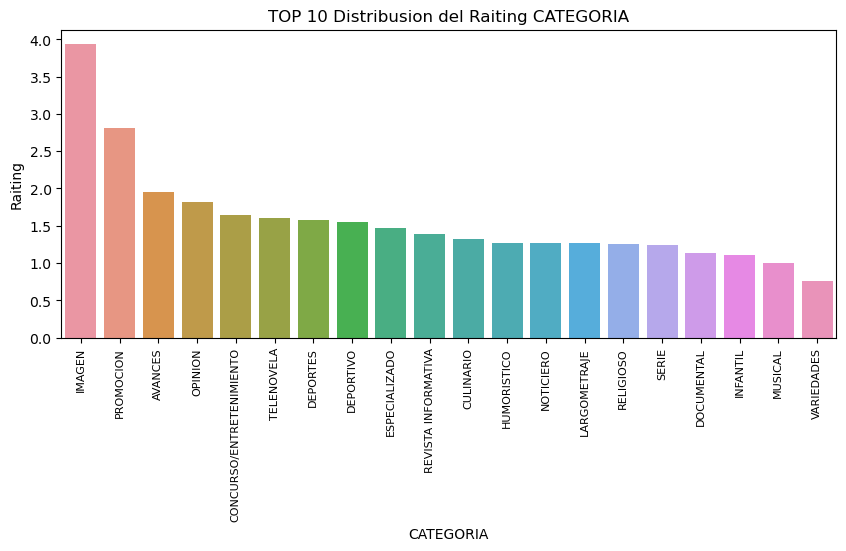

In [17]:
rating_campa   = df.groupby("CAMPAÑA")["RATING"].mean().sort_values( ascending =  False  ).head(50)

plt.figure( figsize = (10,4))
sns.barplot( x =rating_campa.index, y = rating_campa.values)
plt.title("TOP 10 Distribusion del Raiting CATEGORIA")
plt.ylabel("Raiting")
plt.xlabel("CATEGORIA")
plt.xticks( rotation = 90, size = 8) 
plt.show()

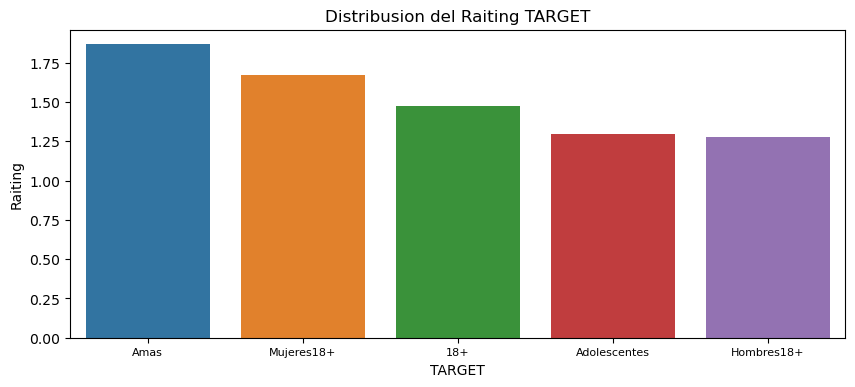

In [18]:
rating_target = df.groupby("TARGET")["RATING"].mean().sort_values( ascending =  False  ).head(10)

plt.figure( figsize = (10,4))
sns.barplot( x = rating_target.index, y = rating_target.values)
plt.title("Distribusion del Raiting TARGET")
plt.ylabel("Raiting")
plt.xlabel("TARGET")
plt.xticks( rotation = 0, size = 8) 
plt.show()

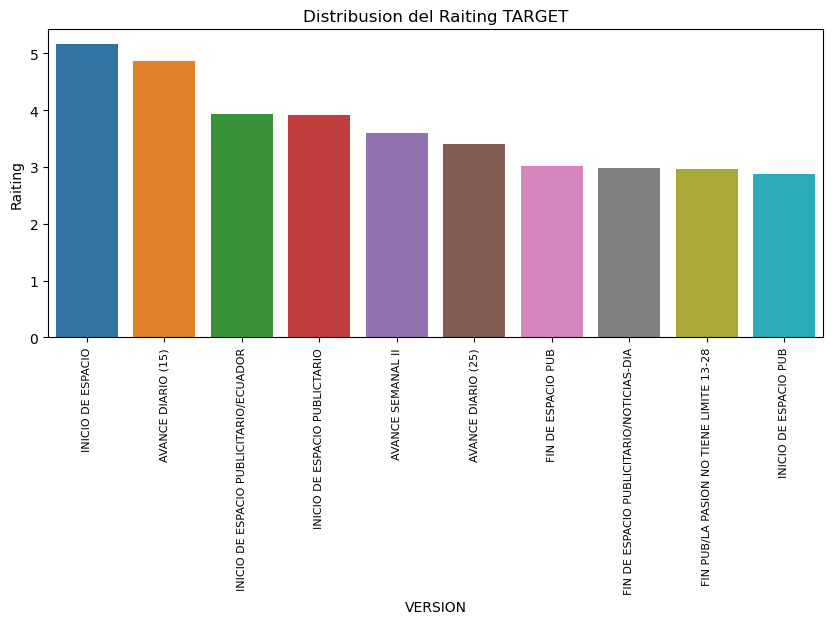

In [19]:
rating_VERSION = df.groupby("VERSION")["RATING"].mean().sort_values( ascending =  False  ).head(10)

plt.figure( figsize = (10,4))
sns.barplot( x = rating_VERSION.index, y =  rating_VERSION.values)
plt.title("Distribusion del Raiting TARGET")
plt.ylabel("Raiting")
plt.xlabel("VERSION")
plt.xticks( rotation = 90, size = 8) 
plt.show()

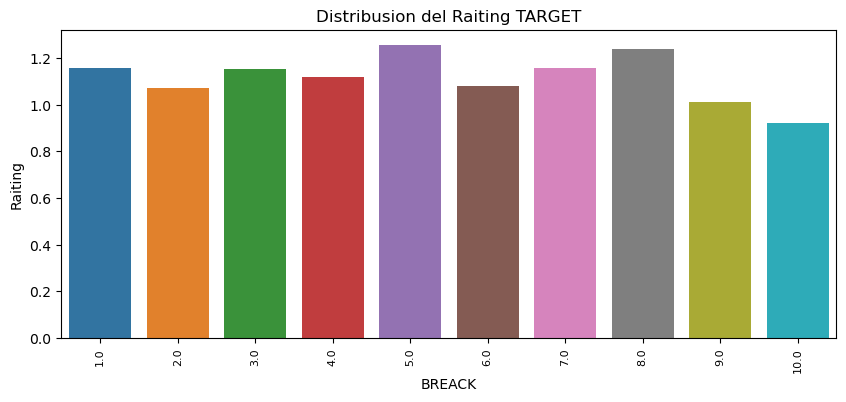

In [21]:
rating_VERSION = df.groupby("BREAK")["RATING"].mean().sort_values( ascending =  False  )

plt.figure( figsize = (10,4))
sns.barplot( x = rating_VERSION.index, y =  rating_VERSION.values)
plt.title("Distribusion del Raiting TARGET")
plt.ylabel("Raiting")
plt.xlabel("BREACK")
plt.xticks( rotation = 90, size = 8) 
plt.show()

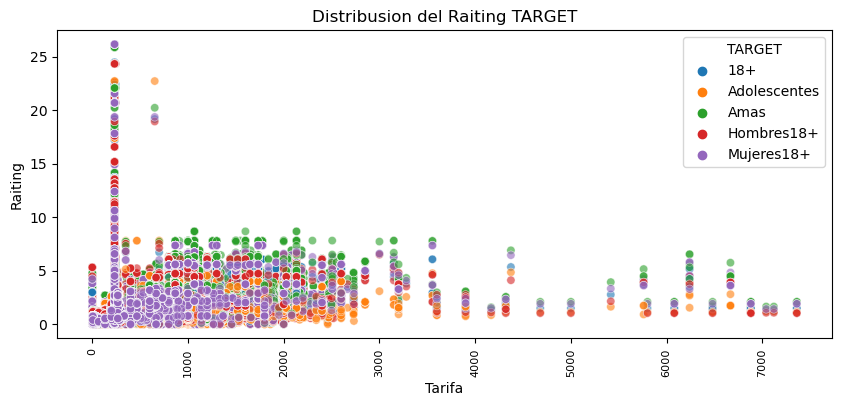

In [20]:
plt.figure( figsize = (10,4))
sns.scatterplot(data= df , x="TARIFA", y="RATING", hue="TARGET", alpha = 0.60)
plt.title("Distribusion del Raiting TARGET")
plt.ylabel("Raiting")
plt.xlabel("Tarifa")
plt.xticks( rotation = 90, size = 8) 

plt.show()

In [23]:
df_p = df.drop("Unnamed: 0", axis = 1 )
df_p.head(2)

,FECHA,VERSION,DURACION,TIPO,HORA,PROGRAMA,BREAK,TARIFA,CATEGORIA,ITEM,GENERO,SECCION/BLOQUE,CIUDAD,CAMPAÑA,HOR_INI-HH:MM:SS,HOR_FIN-HH:MM:SS,RATING,TARGET
0,2023-01-01,AVANCE DIARIO IV,40.0,AUTOPROMOCION,06:07,LARGOMETRAJE (M) (S-D),1.0,133.333300,PROMOCION DEL CANAL,MASTER CHEF ECUADOR 4T,LARGOMETRAJE,A,GUAYAQUIL,CONCURSO/ENTRETENIMIENTO,06:07:40,06:08:20,0.078215,18+
1,2023-01-01,AVANCE DIARIO,38.0,AUTOPROMOCION,06:08,LARGOMETRAJE (M) (S-D),1.0,126.666635,PROMOCION DEL CANAL,IMPACTOS 2022,LARGOMETRAJE,A,GUAYAQUIL,NOTICIERO,06:08:20,06:08:58,0.078215,18+


In [25]:
from sklearn import preprocessing 
endoder = preprocessing.LabelEncoder()
 
df_p["FECHA"]  = endoder.fit_transform(df_p["FECHA"])
df_p["VERSION"]  = endoder.fit_transform(df_p["VERSION"])
df_p["TIPO"]  = endoder.fit_transform(df_p["TIPO"])
df_p["HORA"]  = endoder.fit_transform(df_p["HORA"])
df_p["PROGRAMA"]  = endoder.fit_transform(df_p["PROGRAMA"])
df_p["TARIFA"]  = endoder.fit_transform(df_p["TARIFA"])
df_p["CATEGORIA"]  = endoder.fit_transform(df_p["CATEGORIA"])
df_p["ITEM"]  = endoder.fit_transform(df_p["ITEM"])
df_p["SECCION/BLOQUE"]  = endoder.fit_transform(df_p["SECCION/BLOQUE"])
df_p["CIUDAD"]  = endoder.fit_transform(df_p["CIUDAD"])
df_p["HOR_INI-HH:MM:SS"]  = endoder.fit_transform(df_p["HOR_INI-HH:MM:SS"])
df_p["TARGET"]  = endoder.fit_transform(df_p["TARGET"])
df_p["GENERO"]  = endoder.fit_transform(df_p["GENERO"])
df_p["CAMPAÑA"]  = endoder.fit_transform(df_p["CAMPAÑA"])


In [26]:
df_p.head()

,FECHA,VERSION,DURACION,TIPO,HORA,PROGRAMA,BREAK,TARIFA,CATEGORIA,ITEM,GENERO,SECCION/BLOQUE,CIUDAD,CAMPAÑA,HOR_INI-HH:MM:SS,HOR_FIN-HH:MM:SS,RATING,TARGET
0,214,55,40.0,0,367,367,1.0,58,5,218,9,0,0,1,213,06:08:20,0.078215,0
1,214,8,38.0,0,368,367,1.0,56,5,182,9,0,0,13,228,06:08:58,0.078215,0
2,214,8,30.0,0,383,367,2.0,50,5,236,9,0,0,4,998,06:24:29,0.078215,0
3,214,55,30.0,0,384,367,2.0,50,5,57,9,0,0,18,1028,06:24:59,0.078215,0
4,214,55,40.0,0,401,367,3.0,58,5,218,9,0,0,1,1896,06:42:16,0.078215,0


In [27]:
df_p["RATING"]  = endoder.fit_transform(df_p["RATING"])

In [28]:
#  importar librerias para crear modelos 
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import minmax_scale

In [33]:
#dividaee en etiquetas y caracteristicas 

X = df_p.drop(["RATING" , "HOR_FIN-HH:MM:SS"], axis = 1)
y = df_p["RATING"]


#DIVIDER EN TRAINT Y TEST 

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size =  0.70, random_state = 42 )

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((580248, 16), (248679, 16), (580248,), (248679,))

In [34]:
X_train 

,FECHA,VERSION,DURACION,TIPO,HORA,PROGRAMA,BREAK,TARIFA,CATEGORIA,ITEM,GENERO,SECCION/BLOQUE,CIUDAD,CAMPAÑA,HOR_INI-HH:MM:SS,TARGET
452910,37,117,11.0,2,304,341,2.0,1,5,57,7,4,1,18,63805,1
610527,97,61,30.0,0,613,485,1.0,139,5,2,15,0,0,13,10730,3
57229,237,123,9.0,2,1391,469,3.0,220,5,324,15,2,1,20,50305,3
368569,7,8,20.0,0,323,20,1.0,2,5,255,11,4,0,6,64432,0
201743,301,123,10.0,2,15,93,1.0,188,5,73,14,3,0,8,53656,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259178,308,86,8.0,1,1197,491,1.0,236,5,2,15,2,0,13,41418,4
365838,16,86,10.0,1,1141,464,1.0,236,5,218,15,2,1,1,38238,0
131932,253,123,6.0,2,903,60,2.0,206,5,10,4,1,0,18,25189,4
671155,138,53,20.0,0,279,15,1.0,2,5,256,11,4,1,6,63083,2


In [35]:
modelo = GaussianNB()

In [36]:

modelo.fit( X_train, y_train )



GaussianNB()

In [ ]:
y_pred = modelo.predict(X_test)
y_pred.head()